# **Overview**
One of the most powerful applications enabled by LLMs is sophisticated question-answering (Q&A) chatbots. These are applications that can answer questions about specific source information. These applications use a technique known as Retrieval Augmented Generation, or RAG.

# **What is Retrival Augmented Generation(RAG)?**
RAG is a technique for augmenting LLM knowledge with additional data.

LLMs can reason about wide-ranging topics, but their knowledge is limited to the public data up to a specific point in time that they were trained on. If you want to build AI applications that can reason about private data or data introduced after a model’s cutoff date, you need to augment the knowledge of the model with the specific information it needs. The process of bringing the appropriate information and inserting it into the model prompt is known as Retrieval Augmented Generation (RAG).

LangChain has a number of components designed to help build Q&A applications, and RAG applications more generally.

## **RAG Architecture**
A typical RAG application has two main components:

**Indexing**: a pipeline for ingesting data from a source and indexing it. This usually happens offline.

**Retrieval and generation**: the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

The most common full sequence from raw data to answer looks like:

**Indexing**
1. **Load**: First we need to load our data. This is done with DocumentLoaders

2. **Split**: Text splitters break large Documents into smaller chunks. This is
useful both for indexing data and for passing it in to a model, since large chunks are harder to search over and won’t fit in a model’s finite context window.

3. **Embed**: Each part of the split text is converted into separate embedding vectors with an embedding model.

4. **Store**: We need somewhere to store and index our splits, so that they can later be searched over. This is often done using a VectorStore and Embeddings model.

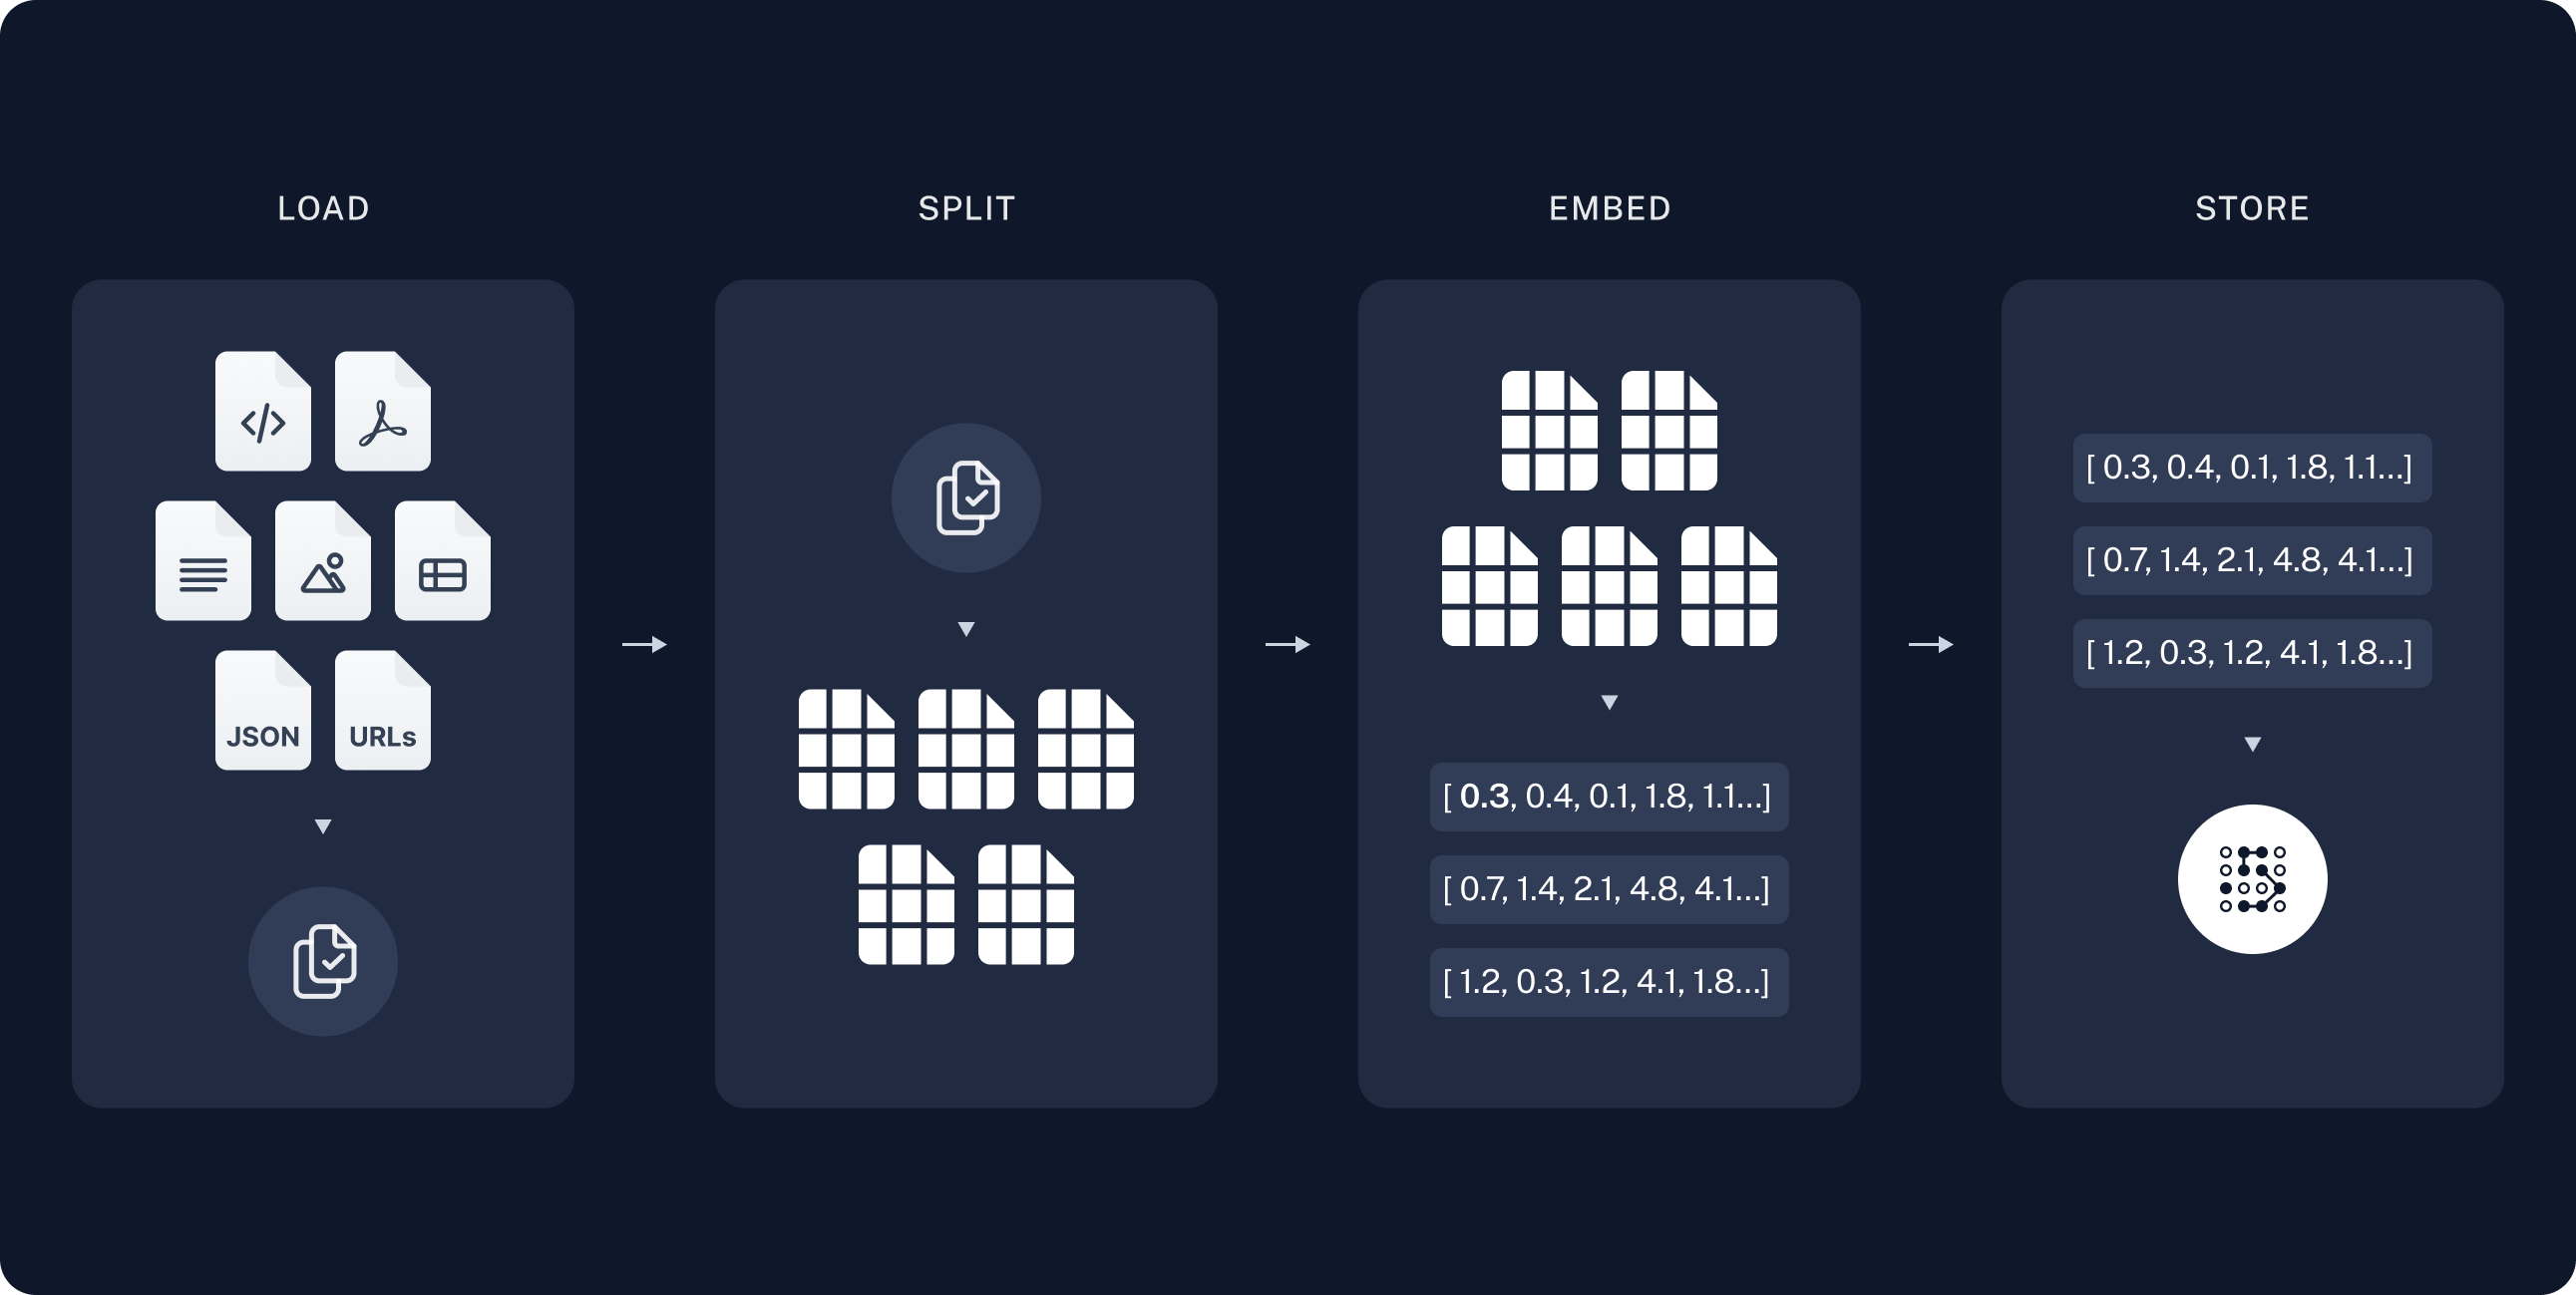

## Retrievers
A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them.

## Retrieval and generation
1. **Retrieve**: Given a user input, relevant splits are retrieved from storage using a Retriever.
2. **Generate**: A ChatModel / LLM produces an answer using a prompt that includes the question and the retrieved data

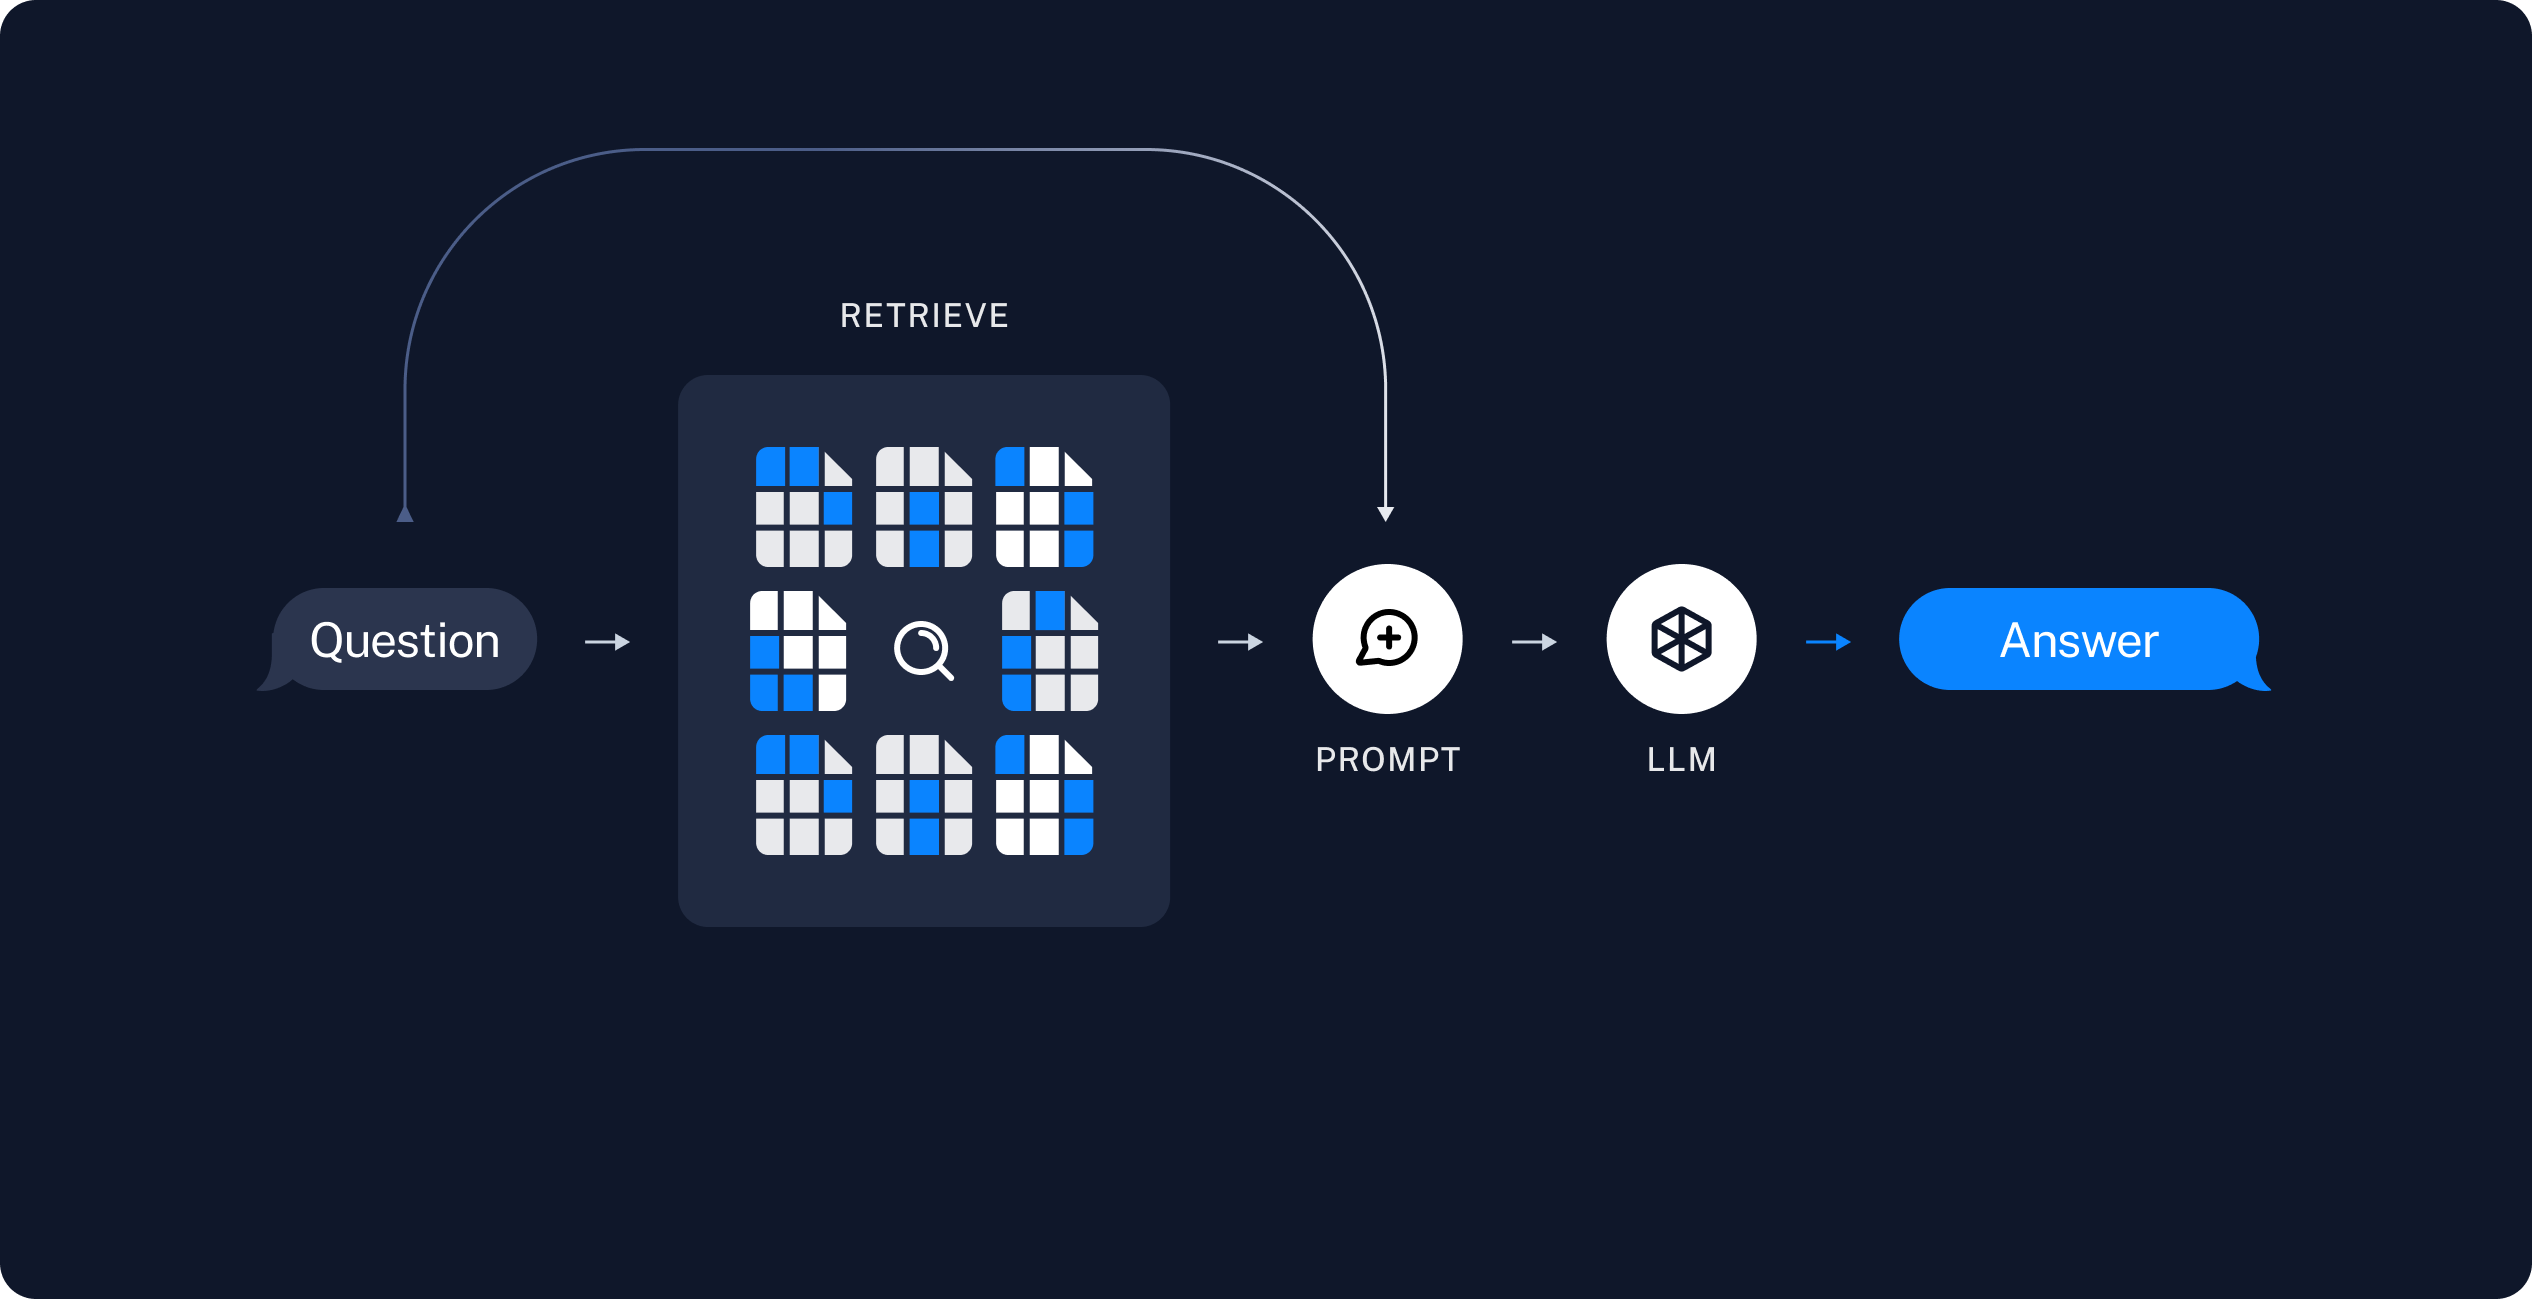

## Install Libraries

In [1]:
!pip install -qU langchain-google-community

#Retrieval (Bilgi Geri Getirme): Bu adımda, belirli bir sorguya yanıt olarak, önceden depolanmış büyük miktardaki metinsel veriden ilgili bilgi
#parçaları geri modele beslenme sürecidir.

# Generation (Metin Üretme):

# Bu adımda, geri getirilen bilgiler kullanılarak model tarafından anlamlı ve doğru bir metin üretim sürecidir. Büyük dil modelleri, bu bilgileri kullanarak
# doğal ve akıcı metinler oluşturur.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 573.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.8/379.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 5.9 MB/s eta 0:00:00


In [2]:
!pip install -qU langchain-community

In [3]:
#!pip install langchain

In [4]:
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.2 MB/s eta 0:00:00


In [5]:
!pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 9.2 MB/s eta 0:00:00


In [6]:
#!pip install -qU chromadb yukarıdaki güncel

In [7]:
!pip install -qU pypdfium2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 37.7 MB/s eta 0:00:00


In [8]:
# drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Loading Document

In [9]:
# create a pdf reader function
from langchain_community.document_loaders import PyPDFium2Loader

def read_doc(directory):
    file_loader=PyPDFium2Loader(directory)#can read web links
    pdf_documents=file_loader.load() # PyPDFium2Loader reads page by page
    return pdf_documents

In [10]:
pdf=read_doc('/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf')
len(pdf)

# The document consists of 15 pages

/usr/local/lib/python3.10/dist-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


15

In [ ]:
pdf

[Document(metadata={'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables and figures in this paper solely for use in journalistic or\r\nscholarly works.\r\nAttention Is All You Need\r\nAshish Vaswani∗\r\nGoogle Brain\r\navaswani@google.com\r\nNoam Shazeer∗\r\nGoogle Brain\r\nnoam@google.com\r\nNiki Parmar∗\r\nGoogle Research\r\nnikip@google.com\r\nJakob Uszkoreit∗\r\nGoogle Research\r\nusz@google.com\r\nLlion Jones∗\r\nGoogle Research\r\nllion@google.com\r\nAidan N. Gomez∗ †\r\nUniversity of Toronto\r\naidan@cs.toronto.edu\r\nŁukasz Kaiser∗\r\nGoogle Brain\r\nlukaszkaiser@google.com\r\nIllia Polosukhin∗ ‡\r\nillia.polosukhin@gmail.com\r\nAbstract\r\nThe dominant sequence transduction models are based on complex recurrent or\r\nconvolutional neural networks that include an encoder and a decoder. The best\r\nperforming models also 

In [ ]:
pdf[2]

Document(metadata={'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf', 'page': 2}, page_content='Figure 1: The Transformer - model architecture.\r\nThe Transformer follows this overall architecture using stacked self-attention and point-wise, fully\r\nconnected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,\r\nrespectively.\r\n3.1 Encoder and Decoder Stacks\r\nEncoder: The encoder is composed of a stack of N = 6 identical layers. Each layer has two\r\nsub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position\x02wise fully connected feed-forward network. We employ a residual connection [11] around each of\r\nthe two sub-layers, followed by layer normalization [1]. That is, the output of each sub-layer is\r\nLayerNorm(x + Sublayer(x)), where Sublayer(x) is the function implemented by the sub-layer\r\nitself. To facilitate these residual connections, all sub-layers in the

## Document/Text Splitter

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter


def chunk_data(docs, chunk_size=800, chunk_overlap=200):
    text_splitter=RecursiveCharacterTextSplitter(chunk_size=chunk_size,
                                                 chunk_overlap=chunk_overlap)
    pdf=text_splitter.split_documents(docs)
    return pdf

# CharacterTextSplitter is not advised for ignoring sentence beginnins and ends.

# This code splits documents into chunks using the RecursiveCharacterTextSplitter class from the langchain library.

# A function named chunk_data is defined, which takes a document or a collection of documents (docs) as input. It also takes two parameters:
# chunk_size and chunk_overlap. chunk_size specifies the maximum number of characters in each chunk, while chunk_overlap determines the amount of
# overlap between consecutive chunks.

# The function divides the documents into chunks based on these parameters using the RecursiveCharacterTextSplitter class. Consequently, each chunk
# contains chunk_size characters, with an overlap of chunk_overlap characters between consecutive chunks.

# As a result, the documents are segmented into chunks of specified sizes, and these chunks are returned.

# The chunk_overlap parameter is used to specify the sharing of characters between consecutive chunks. In other words, it ensures that the characters at
# the end of one chunk reappear at the beginning of the next chunk. This prevents the loss of information when the text is segmented or divided and
# helps preserve a certain context. Especially, overlap can be used to maintain important contextual relationships within a specific text and sustain
# meaning across chunks.

In [12]:
pdf_doc=chunk_data(docs=pdf)
len(pdf_doc)

# divided into 71 pieces

71

In [13]:
pdf_doc[25:27]

# Parts 25 and 26.
# As you can see, the last 200 characters of the 25th piece and the first 200 characters of the 26th piece are the same.

[Document(metadata={'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf', 'page': 5}, page_content='Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations\r\nfor different layer types. n is the sequence length, d is the representation dimension, k is the kernel\r\nsize of convolutions and r the size of the neighborhood in restricted self-attention.\r\nLayer Type Complexity per Layer Sequential Maximum Path Length\r\nOperations\r\nSelf-Attention O(n\r\n2\r\n· d) O(1) O(1)\r\nRecurrent O(n · d\r\n2\r\n) O(n) O(n)\r\nConvolutional O(k · n · d\r\n2\r\n) O(1) O(logk(n))\r\nSelf-Attention (restricted) O(r · n · d) O(1) O(n/r)\r\n3.5 Positional Encoding\r\nSince our model contains no recurrence and no convolution, in order for the model to make use of the\r\norder of the sequence, we must inject some information about the relative or absolute position of the'),
 Document(metadata={'source': '/content/drive/MyDrive/GENAI-

## Embeddings of Each Part of The Split Document/Text

In [14]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY']=userdata.get('openai_key')

The MTEB score is a metric used to assess the comprehensibility of a text. The average MTEB score of an embedding model indicates how effectively the model can enhance the comprehensibility of texts overall. A higher average MTEB score suggests that the embedding model contributes to better comprehensibility of texts, whereas a lower average MTEB score may indicate that the model produces less effective or less comprehensible embedding vectors.

Therefore, the average MTEB score of an embedding model can be an important metric used to evaluate the comprehensibility of texts and assess the performance of the model.

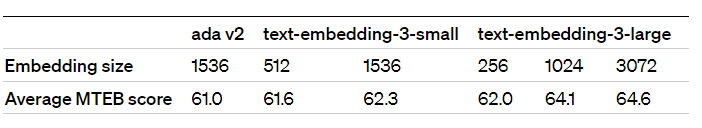

In [15]:
from langchain_openai import OpenAIEmbeddings

embeddings=OpenAIEmbeddings(model="text-embedding-3-large",
                            dimensions=3072) #dimensions=256, 1024, 3072
embeddings

# As the embedding model, we use Openai's latest introduced text-embedding-3-large model.
# dimensions of text-embedding-3-large are 256, 1024 and 3072
# dimensions of text-embedding-3-small are 512 and 1536
# dimension of text-embedding-ada-002 is only 1536

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x7b1659ce1a20>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x7b1659d1ebf0>, model='text-embedding-3-large', dimensions=3072, deployment='text-embedding-ada-002', openai_api_version='', openai_api_base=None, openai_api_type='', openai_proxy='', embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [16]:
text = "This is a test document."

In [17]:
doc_result = embeddings.embed_documents([text])

# We convert the document into embedding vector

In [18]:
doc_result[0][:5]
# First 5 elements of 3072 dimensional embedding vector

[-0.014327365905046463,
 -0.02721378579735756,
 -0.02002730406820774,
 0.057272981852293015,
 -0.022252559661865234]

In [19]:
len(doc_result[0])

3072

## Storing of The Embedding Vectors

### Vector Stores

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

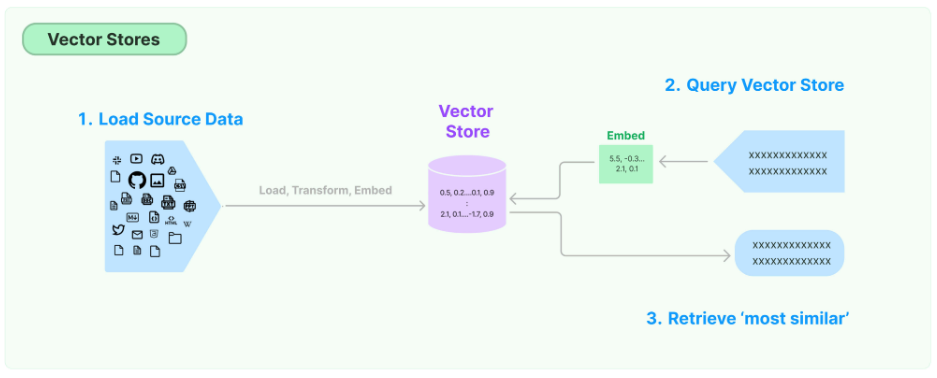

We will use **Chroma Vector Store** for this project

**Chroma DB: An AI-Native Vector Database**

**Introduction:**

- Chroma DB is an open-source vector database specifically designed for storing and efficiently querying embeddings. Embeddings are numerical representations of data, such as text, images, or audio, that are used in various AI applications.

- Chroma DB aims to simplify the development of these applications by providing a robust and scalable infrastructure for managing embeddings.

**Key Features:**

- **Developer Friendly:** Offers quick setup, an intuitive interface, and ready-made libraries for Python and JavaScript.
- **AI-Native:** Optimized for storing and querying vector embeddings, a crucial component in AI systems.
- **Efficient:** Delivers high performance in both storage and querying operations, enabling fast vector similarity searches.
- **Lightweight:** Runs on your local machine without requiring complex external setups.
- **Open Source:** Distributed under the Apache 2.0 license, making it free to use and modify.

**Use Cases:**

- **Similarity Search:** Facilitates "find similar products" or "recommend similar content" functionalities based on the proximity of vectors.
- **Integration with Large Language Models (LLMs):** Supports storing and querying vectorized text or code generated by LLMs.
- **Semantic Search:** Allows users to search for relevant content by converting natural language queries into vectors (e.g., question-answering systems).


In [21]:
from langchain_chroma import Chroma

index=Chroma.from_documents(documents=pdf_doc,
                            embedding=embeddings,
                            persist_directory="/content/drive/MyDrive/GENAI-LLM/Langchain/vectorstore") # persist_directory, saves in the directory

retriever=index.as_retriever() # for using agents

# Load Vectorstore(index)

In [22]:
loaded_index=Chroma(persist_directory="/content/drive/MyDrive/GENAI-LLM/Langchain/vectorstore",
                    embedding_function=embeddings)

## Retrieval

In [23]:
def retrieve_query(query,k=4):
    matching_results=index.similarity_search(query,k=k) #loaded_index
    return matching_results

# The query we ask is first converted into an embedding vector. Then, using the cosine similarity metric, the similarity scores between this vector
# and the embedding vectors in the vector store are calculated and sorted. The top 4 most similar texts are returned

In [24]:
our_query = "What is self-attention?"

doc_search=retrieve_query(our_query, k=2) # first two most similar texts are returned
doc_search

[Document(metadata={'page': 1, 'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf'}, page_content='it more difficult to learn dependencies between distant positions [12]. In the Transformer this is\r\nreduced to a constant number of operations, albeit at the cost of reduced effective resolution due\r\nto averaging attention-weighted positions, an effect we counteract with Multi-Head Attention as\r\ndescribed in section 3.2.\r\nSelf-attention, sometimes called intra-attention is an attention mechanism relating different positions\r\nof a single sequence in order to compute a representation of the sequence. Self-attention has been\r\nused successfully in a variety of tasks including reading comprehension, abstractive summarization,\r\ntextual entailment and learning task-independent sentence representations [4, 27, 28, 22].'),
 Document(metadata={'page': 4, 'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf'}, page_content

## Generating an Answer Based on Similar Embeddings Vectors

In [25]:
from langchain_openai import OpenAI, ChatOpenAI
from langchain.chains.question_answering import load_qa_chain
import textwrap

#https://stackoverflow.com/questions/76692869/how-to-add-memory-to-load-qa-chain-or-how-to-implement-conversationalretrievalch

### Default Prompt

In [26]:
llm=ChatOpenAI(model_name="gpt-4o-mini",
               temperature=0)
chain=load_qa_chain(llm)

In [27]:
print(chain.llm_chain.prompt.messages[0].prompt.template)

Use the following pieces of context to answer the user's question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
{context}


In [28]:
our_query = "What is self-attention?"

doc_search=retrieve_query(our_query) # first four most similar texts are returned
doc_search

[Document(metadata={'page': 1, 'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf'}, page_content='it more difficult to learn dependencies between distant positions [12]. In the Transformer this is\r\nreduced to a constant number of operations, albeit at the cost of reduced effective resolution due\r\nto averaging attention-weighted positions, an effect we counteract with Multi-Head Attention as\r\ndescribed in section 3.2.\r\nSelf-attention, sometimes called intra-attention is an attention mechanism relating different positions\r\nof a single sequence in order to compute a representation of the sequence. Self-attention has been\r\nused successfully in a variety of tasks including reading comprehension, abstractive summarization,\r\ntextual entailment and learning task-independent sentence representations [4, 27, 28, 22].'),
 Document(metadata={'page': 4, 'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf'}, page_content

In [29]:
output= chain.invoke(input={"input_documents":doc_search, "question":our_query})
output

{'input_documents': [Document(metadata={'page': 1, 'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf'}, page_content='it more difficult to learn dependencies between distant positions [12]. In the Transformer this is\r\nreduced to a constant number of operations, albeit at the cost of reduced effective resolution due\r\nto averaging attention-weighted positions, an effect we counteract with Multi-Head Attention as\r\ndescribed in section 3.2.\r\nSelf-attention, sometimes called intra-attention is an attention mechanism relating different positions\r\nof a single sequence in order to compute a representation of the sequence. Self-attention has been\r\nused successfully in a variety of tasks including reading comprehension, abstractive summarization,\r\ntextual entailment and learning task-independent sentence representations [4, 27, 28, 22].'),
  Document(metadata={'page': 4, 'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you nee

In [30]:
output["output_text"]

'Self-attention, sometimes called intra-attention, is an attention mechanism that relates different positions of a single sequence in order to compute a representation of that sequence. It allows each position in the sequence to attend to all other positions, enabling the model to capture dependencies and relationships within the sequence effectively. Self-attention has been successfully used in various tasks, including reading comprehension, abstractive summarization, textual entailment, and learning task-independent sentence representations.'

In [31]:
wrapped_text = textwrap.fill(output["output_text"], width=100)
print(wrapped_text)

Self-attention, sometimes called intra-attention, is an attention mechanism that relates different
positions of a single sequence in order to compute a representation of that sequence. It allows each
position in the sequence to attend to all other positions, enabling the model to capture
dependencies and relationships within the sequence effectively. Self-attention has been successfully
used in various tasks, including reading comprehension, abstractive summarization, textual
entailment, and learning task-independent sentence representations.


In [32]:
def get_answers(query):
    doc_search=retrieve_query(query) # most similar texts are returned
    response=chain.invoke(input={"input_documents":doc_search, "question":query})["output_text"] #
    wrapped_text = textwrap.fill(response, width=100)
    return wrapped_text

In [33]:
our_query = "What is self-attention?"
answer = get_answers(our_query)
print(answer)

Self-attention, sometimes called intra-attention, is an attention mechanism that relates different
positions of a single sequence in order to compute a representation of that sequence. It allows each
position in the sequence to attend to all other positions, enabling the model to capture
dependencies and relationships within the sequence effectively. Self-attention has been successfully
used in various tasks, including reading comprehension, abstractive summarization, textual
entailment, and learning task-independent sentence representations.


In [34]:
our_query = "What is difference transformer and attention?"
answer = get_answers(our_query)
print(answer)

The Transformer is a model architecture that relies entirely on attention mechanisms, specifically
self-attention, to process input and output sequences. Attention mechanisms, on the other hand, are
techniques that allow models to focus on different parts of the input sequence when producing an
output, enabling the modeling of dependencies regardless of their distance in the sequence.  In
summary, attention is a component used within the Transformer architecture, while the Transformer is
a complete model that utilizes attention to achieve its functionality.


## Using Agents with Retriver in GPT

In [36]:
import os
from google.colab import userdata

os.environ["TAVILY_API_KEY"] = userdata.get('tavily_key')

In [37]:
from langchain_community.tools.tavily_search import TavilySearchResults

search_tool = TavilySearchResults(max_results=1)

In [38]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(retriever=retriever,
                                     name="transformers_and_attention_search",
                                     description="Search for information about transformers and attention. For any questions about transformers and attention. \
                                     For any question about article of 'Attention Is All You Need', you must use this tool!.")

In [39]:
!pip install -qU langchainhub

In [40]:
from langchain import hub
prompt = hub.pull("hwchase17/openai-tools-agent")

In [41]:
user_input= "what is langchain framework?"

In [42]:
from langchain.agents import AgentExecutor, create_openai_tools_agent
llm = ChatOpenAI(temperature=0.0,
                 model="gpt-4o-mini",
                 top_p=1.0)

# The tools we'll give the Agent access to.
tools=[retriever_tool, search_tool]

# Finally, let's create an openai agent with the tools, the language model, and the prompt
agent = create_openai_tools_agent(llm, tools, prompt)

# agent_executor performs all the preparations necessary to execute a query.
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Let's test it out!
agent_executor.invoke({"input": user_input})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'LangChain framework'}`


[{'url': 'https://python.langchain.com/v0.2/docs/introduction/', 'content': "LangChain is a framework for developing applications powered by large language models (LLMs). Learn how to use LangChain's open-source libraries, components, and integrations to build, deploy, and monitor LLM applications with tutorials, how-to guides, and API reference."}]LangChain is a framework designed for developing applications powered by large language models (LLMs). It provides open-source libraries, components, and integrations that help developers build, deploy, and monitor LLM applications. The framework includes tutorials, how-to guides, and API references to assist users in utilizing its features effectively. 

For more detailed information, you can visit the [LangChain documentation](https://python.langchain.com/v0.2/docs/introduction/).

> Finished chain.


{'input': 'what is langchain framework?',
 'output': 'LangChain is a framework designed for developing applications powered by large language models (LLMs). It provides open-source libraries, components, and integrations that help developers build, deploy, and monitor LLM applications. The framework includes tutorials, how-to guides, and API references to assist users in utilizing its features effectively. \n\nFor more detailed information, you can visit the [LangChain documentation](https://python.langchain.com/v0.2/docs/introduction/).'}

In [43]:
user_input="What is the transformers and attention?"

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Let's test it out!
agent_executor.invoke({"input": user_input})



> Entering new AgentExecutor chain...

Invoking: `transformers_and_attention_search` with `{'query': 'What is transformers and attention?'}`


Attention mechanisms have become an integral part of compelling sequence modeling and transduction models in various tasks, allowing modeling of dependencies without regard to their distance in
the input or output sequences [2, 19]. In all but a few cases [27], however, such attention mechanisms
are used in conjunction with a recurrent network.
In this work we propose the Transformer, a model architecture eschewing recurrence and instead
relying entirely on an attention mechanism to draw global dependencies between input and output.
The Transformer allows for significantly more parallelization and can reach a new state of the art in
translation quality after being trained for as little as twelve hours on eight P100 GPUs.
2 Background

it more difficult to learn dependencies between distant positions [12]. In the Transformer this is
reduced to

{'input': 'What is the transformers and attention?',
 'output': 'Transformers are a type of model architecture that relies entirely on an attention mechanism to process input and output sequences, without using recurrence. This approach allows for the modeling of dependencies between elements in a sequence, regardless of their distance from each other. The key innovation of the Transformer is its use of self-attention, which relates different positions of a single sequence to compute a representation of that sequence.\n\nAttention mechanisms, particularly self-attention, have become essential in various tasks such as reading comprehension, summarization, and sentence representation. The Transformer model employs multiple attention heads, allowing it to capture different aspects of the input data simultaneously.\n\nThe advantages of using Transformers include:\n\n1. **Parallelization**: Unlike recurrent models, Transformers can process data in parallel, leading to faster training times.

## Using Agents with Retriver in Gemini

In [44]:
!pip install -qU  langchain-google-genai # for gemini models

In [45]:
os.environ['GOOGLE_API_KEY']=userdata.get('gemini_key')

In [46]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                             temperature=0.0,
                             top_p=1.0)

In [47]:
user_input= "what is langchain framework?"

In [48]:
# The tools we'll give the Agent access to.
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",

            "Make sure to use the transformers_and_attention_search tool for questions about transformers and attension, and the tavily_search_results_json tool for questions you don't know about."
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}")
    ]
)

tools=[retriever_tool, search_tool]

# Construct the Tools agent
agent = create_tool_calling_agent(llm, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input": user_input})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'what is langchain framework'}`


[{'url': 'https://python.langchain.com/v0.2/docs/introduction/', 'content': "Introduction. LangChain is a framework for developing applications powered by large language models (LLMs).. LangChain simplifies every stage of the LLM application lifecycle: Development: Build your applications using LangChain's open-source building blocks, components, and third-party integrations.Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support."}]LangChain is a framework for developing applications powered by large language models (LLMs). It simplifies every stage of the LLM application lifecycle, from development to deployment. LangChain provides open-source building blocks, components, and third-party integrations to help you build your applications. You can also use LangGraph to build stateful agents with first-class streaming an

{'input': 'what is langchain framework?',
 'output': 'LangChain is a framework for developing applications powered by large language models (LLMs). It simplifies every stage of the LLM application lifecycle, from development to deployment. LangChain provides open-source building blocks, components, and third-party integrations to help you build your applications. You can also use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support. \n'}

In [49]:
tools[1].name

'tavily_search_results_json'

In [50]:
tools[0].name

'transformers_and_attention_search'

In [51]:
user_input="What is the transformers and attention?"
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input": user_input})



> Entering new AgentExecutor chain...

Invoking: `transformers_and_attention_search` with `{'query': 'What is the transformers and attention?'}`


Attention mechanisms have become an integral part of compelling sequence modeling and transduction models in various tasks, allowing modeling of dependencies without regard to their distance in
the input or output sequences [2, 19]. In all but a few cases [27], however, such attention mechanisms
are used in conjunction with a recurrent network.
In this work we propose the Transformer, a model architecture eschewing recurrence and instead
relying entirely on an attention mechanism to draw global dependencies between input and output.
The Transformer allows for significantly more parallelization and can reach a new state of the art in
translation quality after being trained for as little as twelve hours on eight P100 GPUs.
2 Background

it more difficult to learn dependencies between distant positions [12]. In the Transformer this is
reduce

{'input': 'What is the transformers and attention?',
 'output': "Transformers are a type of neural network architecture that uses attention mechanisms to process sequential data. They are particularly well-suited for tasks like machine translation, text summarization, and question answering. \n\nHere's a breakdown of the key concepts:\n\n* **Attention:** Attention mechanisms allow the model to focus on specific parts of the input sequence that are most relevant to the task at hand. This is done by assigning weights to different parts of the input, with higher weights given to more important parts.\n* **Transformer:** The Transformer architecture is built entirely on attention mechanisms, eliminating the need for recurrent neural networks (RNNs) which are often used in traditional sequence modeling. This allows for faster training and better parallelization.\n\nThe Transformer architecture has revolutionized natural language processing (NLP) and has been used to achieve state-of-the-art

## Langgraph Agent

### GPT Models

In [52]:
!pip install -qU langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 4.3 MB/s eta 0:00:00


In [53]:
user_input= "what is langchain framework?"

In [54]:
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(temperature=0.0,
                 model="gpt-4o-mini",
                 top_p=1)

# The tools we'll give the Agent access to.
tools = [retriever_tool, search_tool] # search_tool


model_with_tools = llm.bind_tools(tools)

agent_executor = create_react_agent(model_with_tools, tools)

response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='what is langchain framework?', id='719498f1-3bb3-47f8-9fa7-a2133572f8fb'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wisMJIfk0WrDWFtxtnAFezZE', 'function': {'arguments': '{"query":"LangChain framework"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 146, 'total_tokens': 166}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_611b667b19', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e6681160-623f-4159-866f-f2a63a6c3369-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'LangChain framework'}, 'id': 'call_wisMJIfk0WrDWFtxtnAFezZE', 'type': 'tool_call'}], usage_metadata={'input_tokens': 146, 'output_tokens': 20, 'total_tokens': 166}),
 ToolMessage(content='[{"url": "https://python.langchain.com/v0.2/docs/introduction/", "content": "LangChain is a framework for developing applications powered by l

In [55]:
response["messages"][-1].content

'LangChain is a framework designed for developing applications powered by large language models (LLMs). It provides open-source libraries, components, and integrations that help developers build, deploy, and monitor LLM applications. The framework includes tutorials, how-to guides, and API references to assist users in utilizing its features effectively. \n\nFor more detailed information, you can visit the [LangChain documentation](https://python.langchain.com/v0.2/docs/introduction/).'

### Claude Models

In [56]:
!pip install -qU langchain-anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.6/866.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 19.2 MB/s eta 0:00:00


In [ ]:
os.environ["CLAUDE_API_KEY"] = userdata.get('CLAUDE_API_KEY')

In [58]:
from langchain_anthropic import ChatAnthropic

llm = ChatAnthropic(model='claude-3-5-sonnet-20240620', #claude-3-sonnet, claude-3-opus, claude-3-haiku
                    temperature=0,
                    top_p=1.0,
                    api_key=os.environ["claude-key-api-key"]
                    )

In [ ]:
user_input= "what is langchain framework?"

tools = [retriever_tool, search_tool] # search_tool


model_with_tools = llm.bind_tools(tools)

agent_executor = create_react_agent(model_with_tools, tools)

response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='what is langchain framework?', id='0f839070-acd0-4203-9748-f841b8d173e4'),
 AIMessage(content=[{'text': "To answer your question about the LangChain framework, I'll need to search for some up-to-date information. Let me do that for you.", 'type': 'text'}, {'id': 'toolu_01FMZnynSSuYJiTnobs9RCa8', 'input': {'query': 'LangChain framework definition and overview'}, 'name': 'tavily_search_results_json', 'type': 'tool_use'}], response_metadata={'id': 'msg_0123zE1zQpUQjtqZr2sb69Qg', 'model': 'claude-3-5-sonnet-20240620', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'input_tokens': 510, 'output_tokens': 99}}, id='run-3411e7e9-7998-4b37-b90b-d04dd8e59a3f-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'LangChain framework definition and overview'}, 'id': 'toolu_01FMZnynSSuYJiTnobs9RCa8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 510, 'output_tokens': 99, 'total_tokens': 609}),
 ToolMessage(content='[{"url": "https://pyt

In [ ]:
response["messages"][-1].content

"Based on the search results, I can provide you with an overview of the LangChain framework:\n\nLangChain is a framework designed for developing applications powered by large language models (LLMs). It aims to simplify the entire lifecycle of LLM application development. Here are some key points about LangChain:\n\n1. Purpose: LangChain is specifically created to make it easier to build applications that leverage the power of large language models.\n\n2. Simplification: It simplifies various stages of the LLM application lifecycle, from development to deployment.\n\n3. Building Blocks: LangChain provides open-source building blocks, components, and third-party integrations that developers can use to construct their applications.\n\n4. LangGraph: It includes a feature called LangGraph, which allows developers to build stateful agents. These agents have first-class streaming support and can incorporate human-in-the-loop functionality.\n\n5. Flexibility: The framework is designed to be fl

In [ ]:
user_input="What is the transformers and attention?"

response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='What is the transformers and attention?', id='d910e9d2-476c-41bc-8ae6-a6e730245f95'),
 AIMessage(content=[{'text': "To provide you with accurate and comprehensive information about transformers and attention, I'll need to use the specialized search tool for this topic. Let me search for that information for you.", 'type': 'text'}, {'id': 'toolu_01X1kdCvb5Jy4qvemEnXovSH', 'input': {'query': 'What are transformers and attention in machine learning?'}, 'name': 'transformers_and_attention_search', 'type': 'tool_use'}], response_metadata={'id': 'msg_01QANdb1iqGQhM5KNiZF9nPe', 'model': 'claude-3-5-sonnet-20240620', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'input_tokens': 512, 'output_tokens': 104}}, id='run-4789f083-18ab-42de-a575-390d1eecd53b-0', tool_calls=[{'name': 'transformers_and_attention_search', 'args': {'query': 'What are transformers and attention in machine learning?'}, 'id': 'toolu_01X1kdCvb5Jy4qvemEnXovSH', 'type': 'tool_call'}], usage_

In [ ]:
response["messages"][-1].content

'Based on the search results, I can provide you with information about transformers and attention in machine learning:\n\n1. Transformers:\nTransformers are a type of model architecture in machine learning that was introduced in the paper "Attention Is All You Need" by Vaswani et al. The key innovation of transformers is that they rely entirely on attention mechanisms to process input and output sequences, without using recurrent neural networks (RNNs) or convolutional neural networks (CNNs).\n\nKey features of transformers:\n- They allow for more parallelization in processing, which leads to faster training times.\n- They can model dependencies between input and output elements regardless of their distance in the sequence.\n- They have achieved state-of-the-art performance in various natural language processing tasks.\n\n2. Attention:\nAttention is a mechanism that allows a model to focus on different parts of the input when producing each element of the output. In the context of tran

### Gemini Models

In [59]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                             temperature=0.0,
                             top_p=1.0)

In [60]:
user_input= "what is langchain framework?"

tools = [retriever_tool, search_tool] # search_tool


model_with_tools = llm.bind_tools(tools)

agent_executor = create_react_agent(model_with_tools, tools)

response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='what is langchain framework?', id='83b73697-3fe6-45a3-b1a6-e3271798f20d'),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "what is langchain framework"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-a7602c87-db5a-4edc-a7ce-b54634f4f12a-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'what is langchain framework'}, 'id': '92103520-4d9e-4c3f-8204-4cdddc420b04', 'type': 'tool_call'}], usage_metadata={'input_token

In [61]:
response["messages"][-1].content

'LangChain is a framework for developing applications powered by large language models (LLMs). It simplifies every stage of the LLM application lifecycle, from development to deployment. LangChain provides building blocks, components, and third-party integrations to help you build your applications. It also includes LangGraph, which allows you to build stateful agents with first-class streaming and human-in-the-loop support. \n'

In [62]:
user_input= "What is the transformers and attention?"


response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='What is the transformers and attention?', id='313b0420-f1db-4a0b-bcb6-faed584feced'),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'transformers_and_attention_search', 'arguments': '{"query": "What is the transformers and attention?"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-a122e8ce-b418-412b-a1af-75eee01e3507-0', tool_calls=[{'name': 'transformers_and_attention_search', 'args': {'query': 'What is the transformers and attention?'}, 'id': 'a9cc608b-714c-4a6d-b91c-99a75ac5c60d', 't

In [63]:
response["messages"][-1].content

"Transformers and attention are key concepts in natural language processing (NLP).  Transformers are a type of neural network architecture that uses attention mechanisms to process sequential data, like text. \n\nHere's a breakdown:\n\n* **Attention:**  Imagine you're reading a long document. You don't focus on every word equally. You pay more attention to certain words or phrases that are important for understanding the main idea. Attention mechanisms in NLP work similarly. They allow the model to focus on the most relevant parts of the input sequence when generating an output.\n\n* **Transformers:**  Transformers are neural networks that use attention mechanisms to process sequences. They excel at tasks like machine translation, text summarization, and question answering.  They've revolutionized NLP because they can capture long-range dependencies in text, which traditional recurrent neural networks (RNNs) struggled with.\n\nIn essence, transformers use attention to learn relationshi